## matplotlib_circuit_drawer: matplotlib-based quantum circuit drawer

A drop-in replacement of `latex_circuit_drawer`. Users do not need to install latex to draw circuits.

***
### Contributors
Takashi Imamichi, Naoki Kanazawa

### Setup

You first import QISKit and matplotlib_drawer.
In order to visualize circuits on Jupyter notebook, you need to enable the inline mode of matplotlib.

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from math import pi
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import matplotlib_circuit_drawer as drawer, qx_color_scheme

# The following lines are necessary for Jupter notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Create a quantum circuit
You can design a quantum circuit with quantum registers, quantum gates and classical registers.

In [3]:
# Create a Quantum Register called "q" with 3 qubits
qr = QuantumRegister(3, 'q')

# Create a Classical Register called "c" with 3 bits
cr = ClassicalRegister(3, 'c')

In [4]:
# Create a Quantum Circuit called involving "qr" and "cr"
circuit = QuantumCircuit(qr, cr)

circuit.x(qr[0]).c_if(cr, 3)
circuit.z(qr[0])
circuit.u2(pi/2, 2*pi/3, qr[1])

circuit.cu1(pi, qr[0], qr[1])

# Barrier to seperator the input from the circuit
circuit.barrier(qr[0])
circuit.barrier(qr[1])
circuit.barrier(qr[2])

# Toffoli gate from qubit 0,1 to qubit 2
circuit.ccx(qr[0], qr[1], qr[2])

# CNOT (Controlled-NOT) gate from qubit 0 to qubit 1
circuit.cx(qr[0], qr[1])

circuit.swap(qr[0], qr[2])

# measure gate from qr to cr
circuit.measure(qr, cr)

### Extract OpenQASM

You can obtain a OpenQASM representation of your code.

In [5]:
QASM_source = circuit.qasm()
print(QASM_source)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c[3];
if(c==3) x q[0];
z q[0];
u2(1.57079632679490,2.09439510239320) q[1];
cu1(3.14159265358979) q[0],q[1];
barrier q[0];
barrier q[1];
barrier q[2];
ccx q[0],q[1],q[2];
cx q[0],q[1];
swap q[0],q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];



### Visualize Circuit

You can visualize your circuit using `matplotlib_drawer`, which plots the unrolled circuit in the specified basis. You can adjust the size by specifying `scale`.

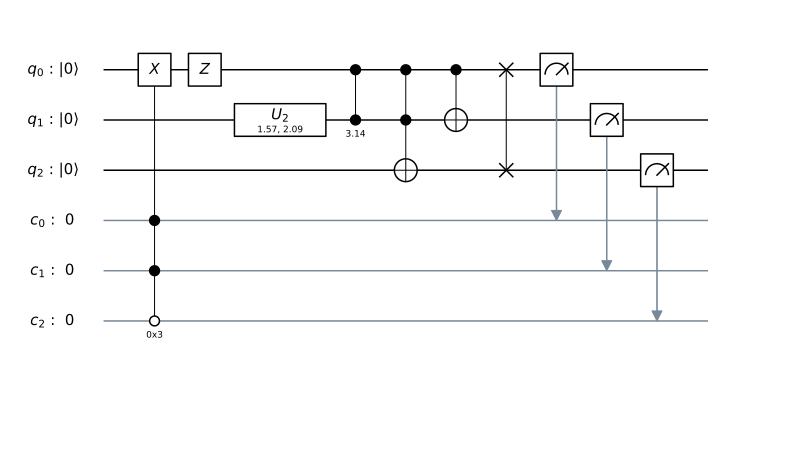

In [6]:
drawer(circuit)

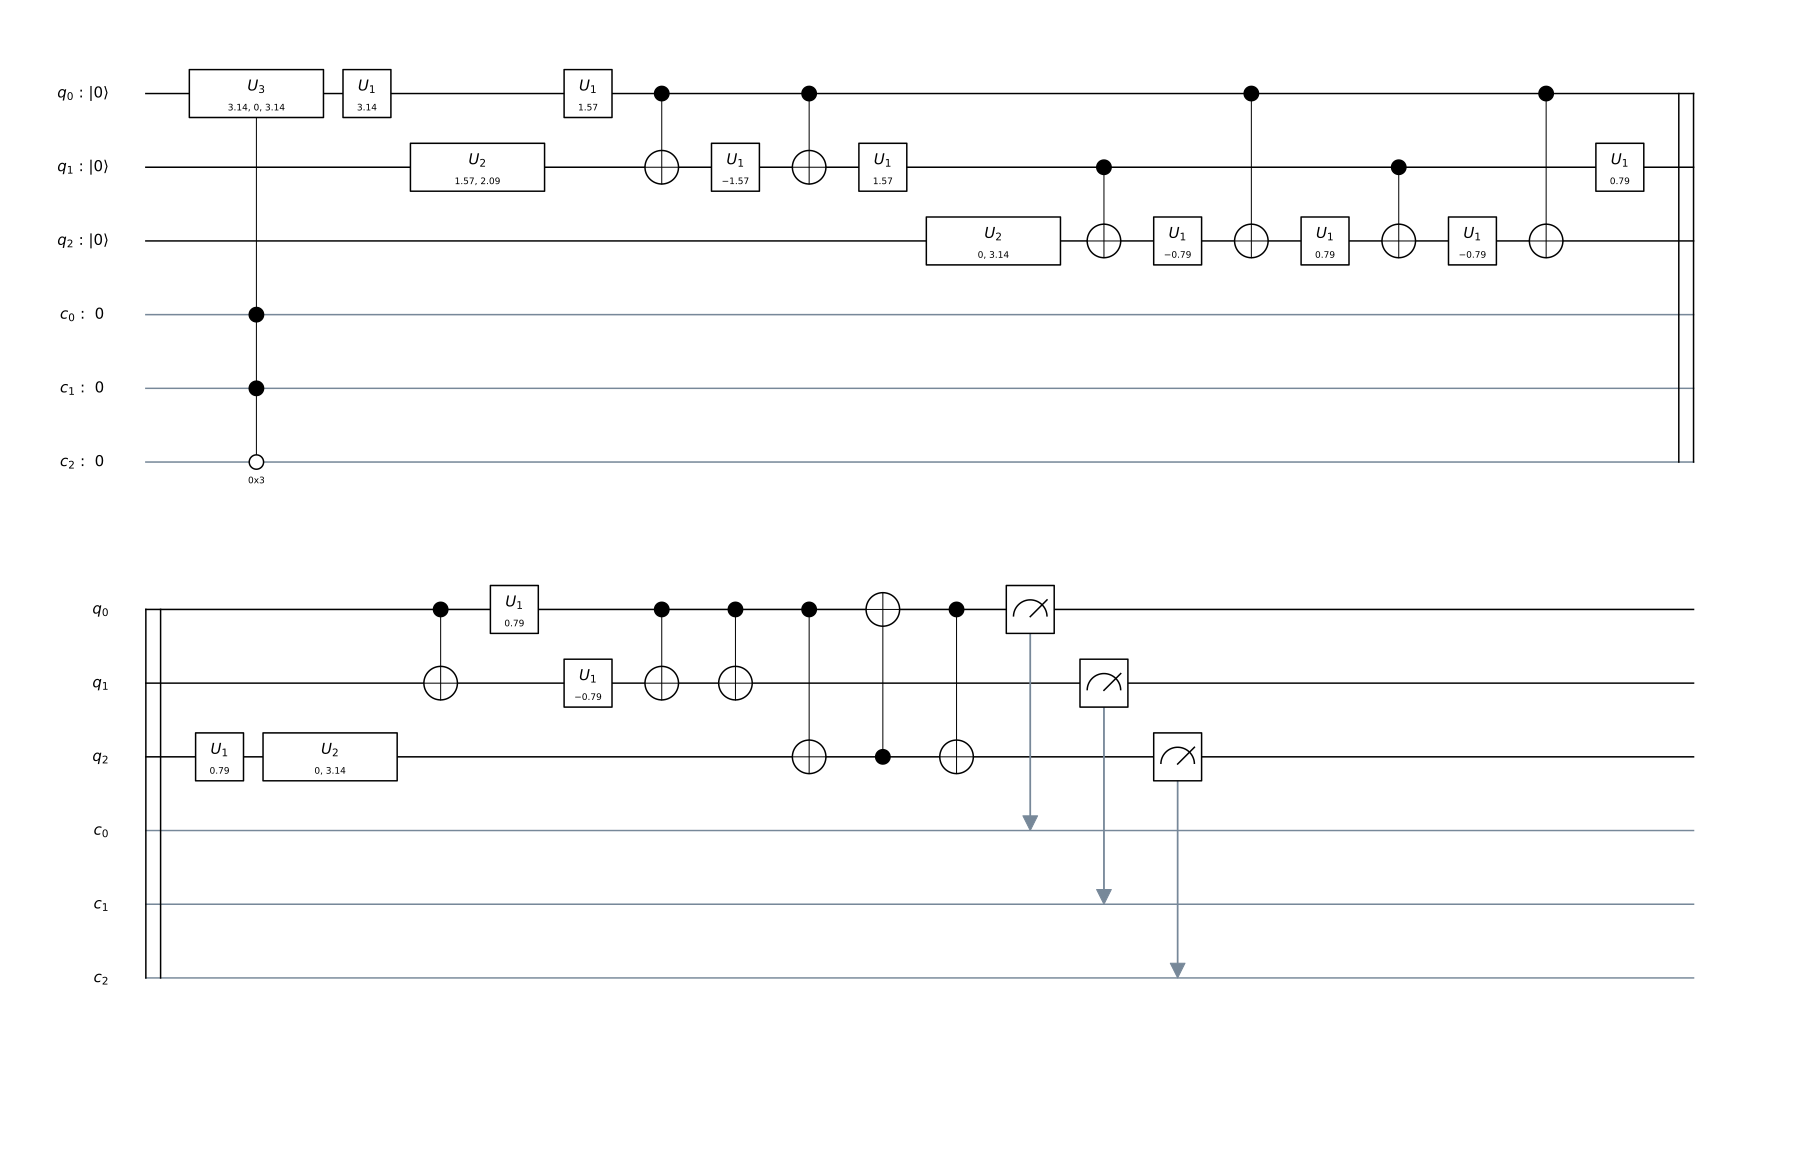

In [7]:
drawer(circuit, basis='u1,u2,u3,id,cx', scale=1.0)

## Use Stylesheet
You can configure your plot appearance by using style sheet written in dictionary format.

### Show Barriers

You can visualize barriers by `barrier` key.

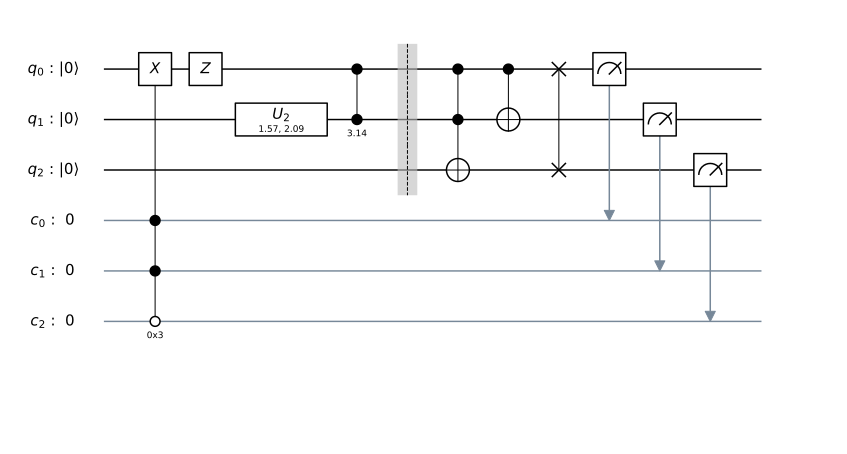

In [8]:
my_style = {'plotbarrier': True}
drawer(circuit, style=my_style)

### Bundle Classical Registers

You can combine classical registers into a single line by `cregbundle` key.

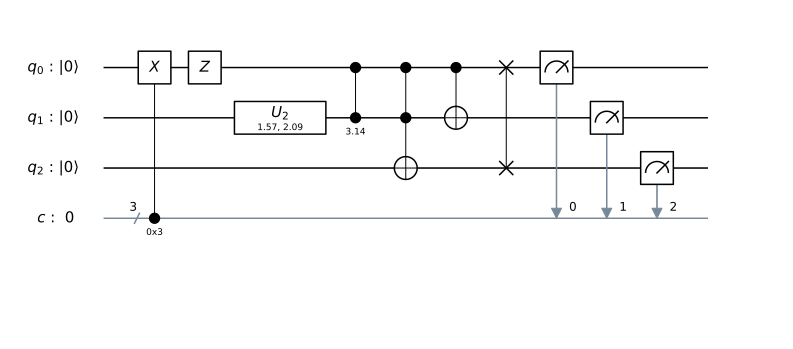

In [9]:
my_style = {'cregbundle': True}
drawer(circuit, style=my_style)

### Show Index

Index of operation can be shown by `index` key.

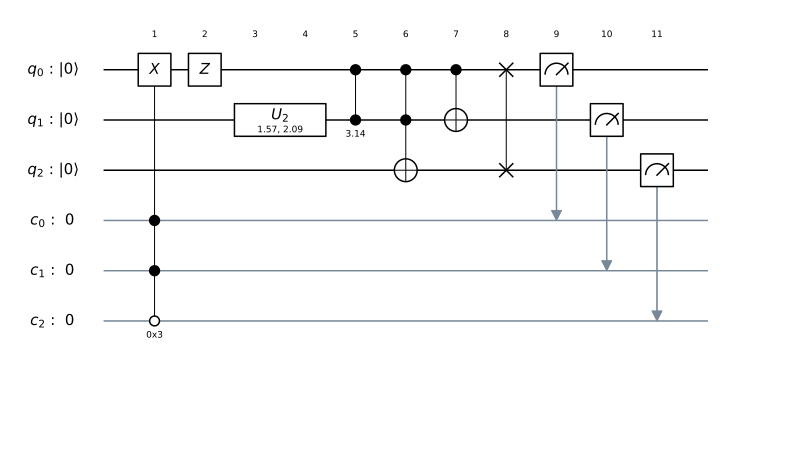

In [10]:
my_style = {'showindex': True}
drawer(circuit, style=my_style)

### Reduce Gap Between Gate

You can reduce redundant gaps between gates by `compress` key.

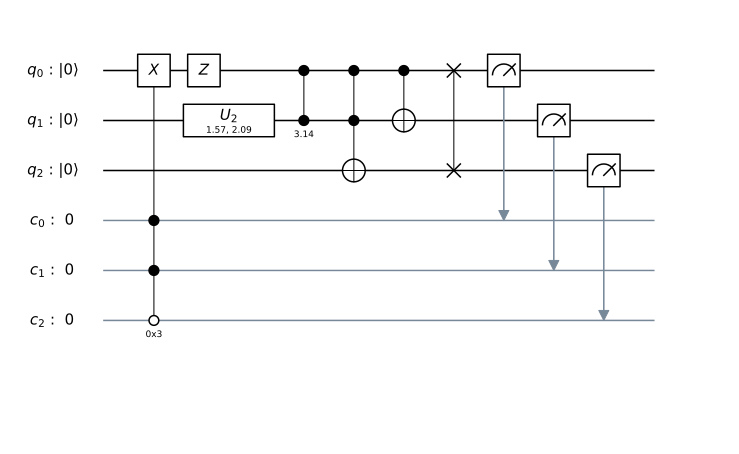

In [11]:
my_style = {'compress': True}
drawer(circuit, style=my_style)

### Fold a Long Circuit

When the horizontal size of screen is limited, you can fold a circuit in multiple lines.
Maximum number of gate in a single line is specified by `fold` key (default: 20). If the value of key is less than 2, no folding option will be applied.

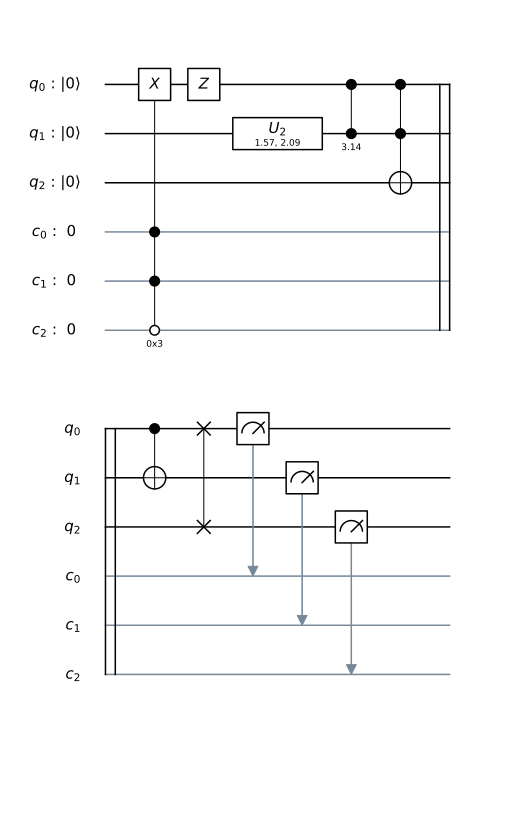

In [12]:
my_style = {'fold': 6}
drawer(circuit, style=my_style)

### Show Rotation Parameters in the unit of $\pi$
You can show rotation parameters in the unit of $\pi$ by `usepiformat` key.

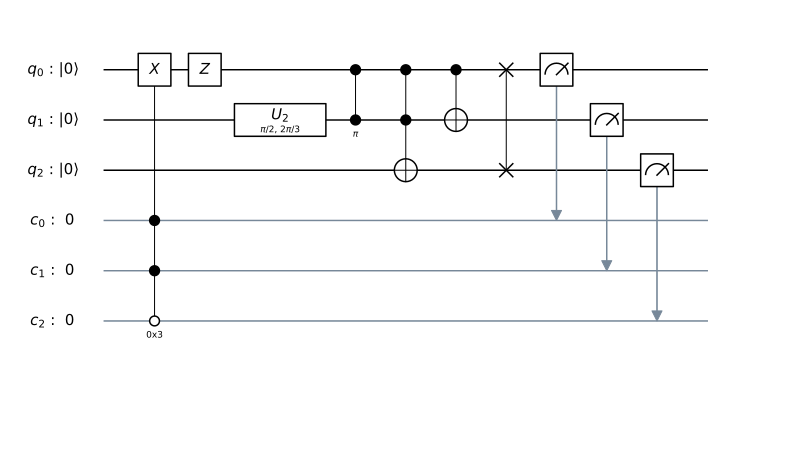

In [13]:
my_style = {'usepiformat': True}
drawer(circuit, style=my_style)

### Use Emoji and LaTeX Symbols as Gate Symbols
You can use unicode characters and latex symbols supported by matplotlib for gates.

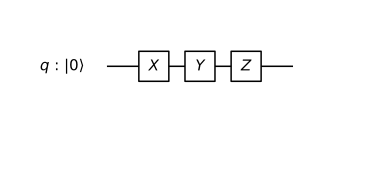

In [14]:
qr = QuantumRegister(1, 'q')
circuit_xyz = QuantumCircuit(qr)
circuit_xyz.x(qr[0])
circuit_xyz.y(qr[0])
circuit_xyz.z(qr[0])
drawer(circuit_xyz)

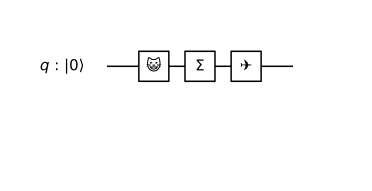

In [15]:
my_style = {'displaytext': {'x': '😺', 'y': '\Sigma', 'z': '✈'}}
drawer(circuit_xyz, style=my_style)

### Different style of gates: cz, cu1
CZ and CU1 gates can be visuarized in different formats by disable `latexdrawerstyle` key.

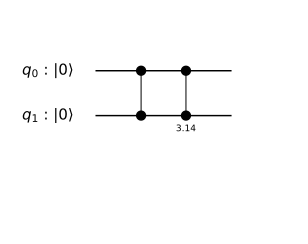

In [16]:
qr = QuantumRegister(2, 'q')
circuit_cucz = QuantumCircuit(qr)
circuit_cucz.cz(qr[0], qr[1])
circuit_cucz.cu1(pi, qr[0], qr[1])
drawer(circuit_cucz)

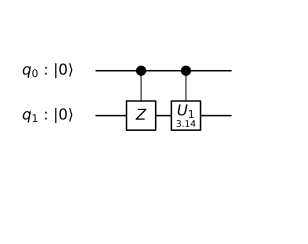

In [17]:
my_style = {'latexdrawerstyle': False}
drawer(circuit_cucz, style=my_style)

### All Options

You can use own style sheet to suit the result to your GUI. By combining above options, composer of IBM Q Experience can be reproduced.

In [18]:
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')
circuit_all = QuantumCircuit(qr, cr)

circuit_all.x(qr[0])
circuit_all.y(qr[0])
circuit_all.z(qr[0])
circuit_all.barrier(qr[0])
circuit_all.barrier(qr[1])
circuit_all.barrier(qr[2])
circuit_all.h(qr[0])
circuit_all.s(qr[0])
circuit_all.sdg(qr[0])
circuit_all.t(qr[0])
circuit_all.tdg(qr[0])
circuit_all.iden(qr[0])
circuit_all.reset(qr[0])
circuit_all.rx(pi, qr[0])
circuit_all.ry(pi, qr[0])
circuit_all.rz(pi, qr[0])
circuit_all.u0(pi, qr[0])
circuit_all.u1(pi, qr[0])
circuit_all.u2(pi, pi, qr[0])
circuit_all.u3(pi, pi, pi, qr[0])
circuit_all.swap(qr[0], qr[1])
circuit_all.cx(qr[0], qr[1])
circuit_all.cy(qr[0], qr[1])
circuit_all.cz(qr[0], qr[1])
circuit_all.ch(qr[0], qr[1])
circuit_all.cu1(pi, qr[0], qr[1])
circuit_all.cu3(pi, pi, pi, qr[0], qr[1])
circuit_all.crz(pi, qr[0], qr[1])
circuit_all.ccx(qr[0], qr[1], qr[2])
circuit_all.cswap(qr[0], qr[1], qr[2])

circuit_all.measure(qr, cr)

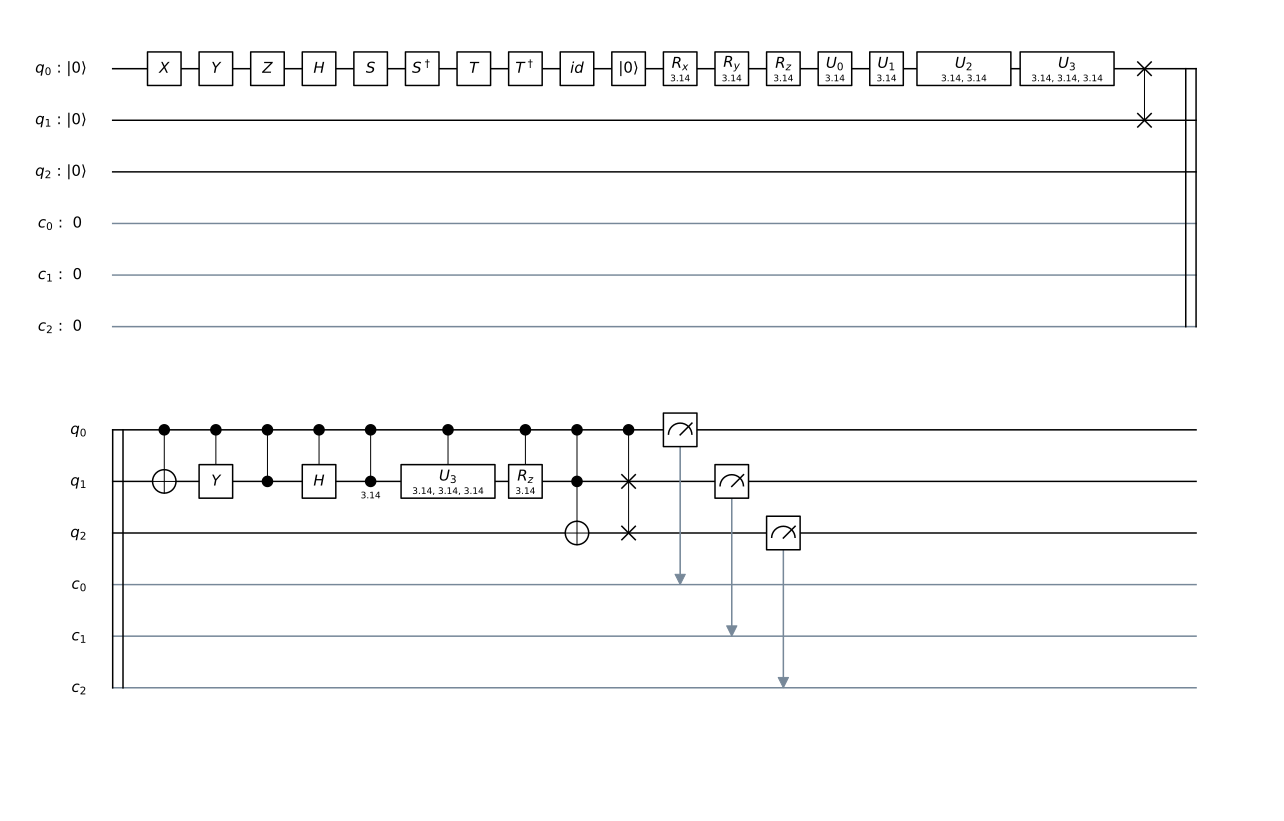

In [19]:
drawer(circuit_all)

You can configure the color scheme. Composer style sheet is prepared as `qx_color_scheme`.

In [20]:
cmp_style = qx_color_scheme()
cmp_style

{'comment': 'Style file for matplotlib_drawer (IBM QX Composer style)',
 'textcolor': '#000000',
 'gatetextcolor': '#000000',
 'subtextcolor': '#000000',
 'linecolor': '#000000',
 'creglinecolor': '#b9b9b9',
 'gatefacecolor': '#ffffff',
 'barrierfacecolor': '#bdbdbd',
 'backgroundcolor': '#ffffff',
 'fold': 20,
 'fontsize': 15,
 'subfontsize': 9,
 'figwidth': -1,
 'dpi': 150,
 'displaytext': {'id': 'id',
  'u0': 'U_0',
  'u1': 'U_1',
  'u2': 'U_2',
  'u3': 'U_3',
  'x': 'X',
  'y': 'Y',
  'z': 'Z',
  'h': 'H',
  's': 'S',
  'sdg': 'S^\\dagger',
  't': 'T',
  'tdg': 'T^\\dagger',
  'rx': 'R_x',
  'ry': 'R_y',
  'rz': 'R_z',
  'reset': '\\left|0\\right\\rangle'},
 'displaycolor': {'id': '#ffca64',
  'u0': '#f69458',
  'u1': '#f69458',
  'u2': '#f69458',
  'u3': '#f69458',
  'x': '#a6ce38',
  'y': '#a6ce38',
  'z': '#a6ce38',
  'h': '#00bff2',
  's': '#00bff2',
  'sdg': '#00bff2',
  't': '#ff6666',
  'tdg': '#ff6666',
  'rx': '#ffca64',
  'ry': '#ffca64',
  'rz': '#ffca64',
  'reset': '#d

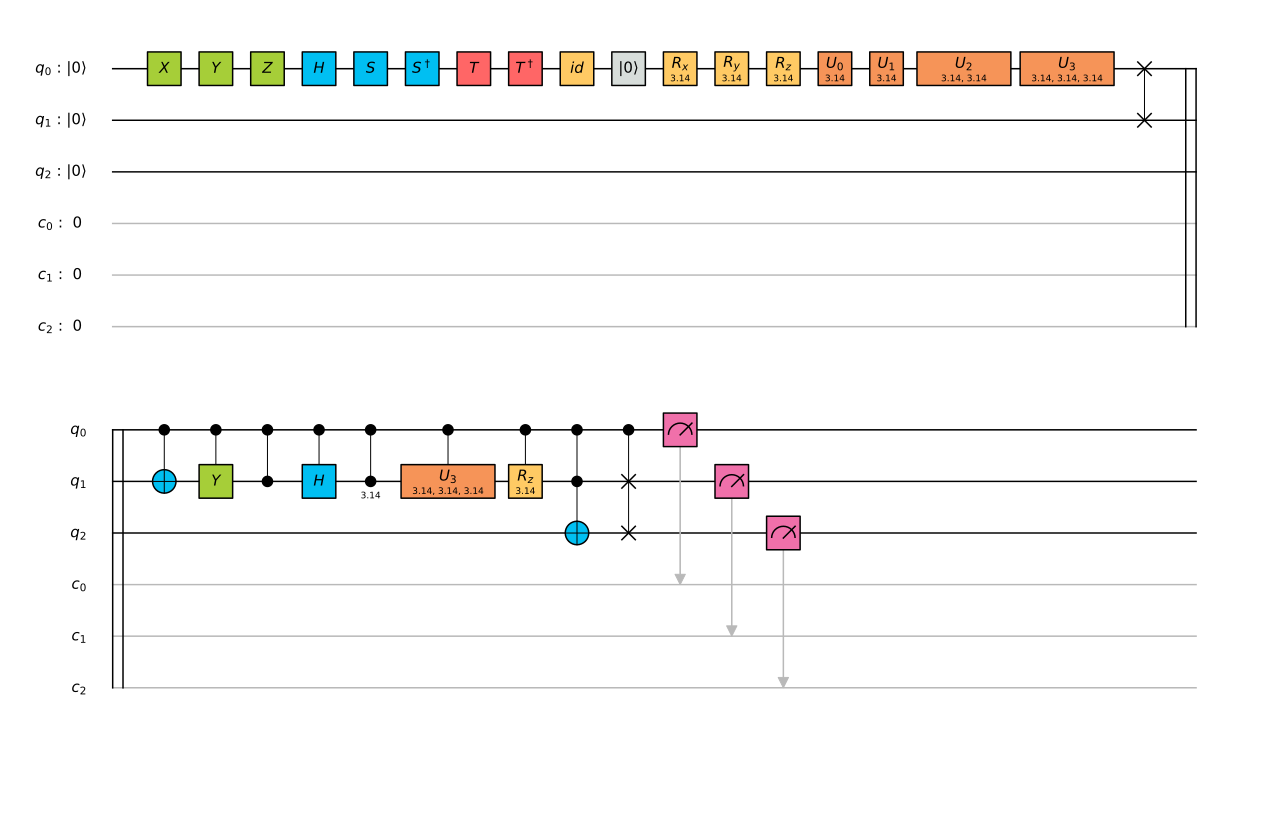

In [21]:
drawer(circuit_all, style=cmp_style)

## Save the circuit image to a file
The following line saves the image to 'circuit.pdf' by specifying a parameter `filename`.

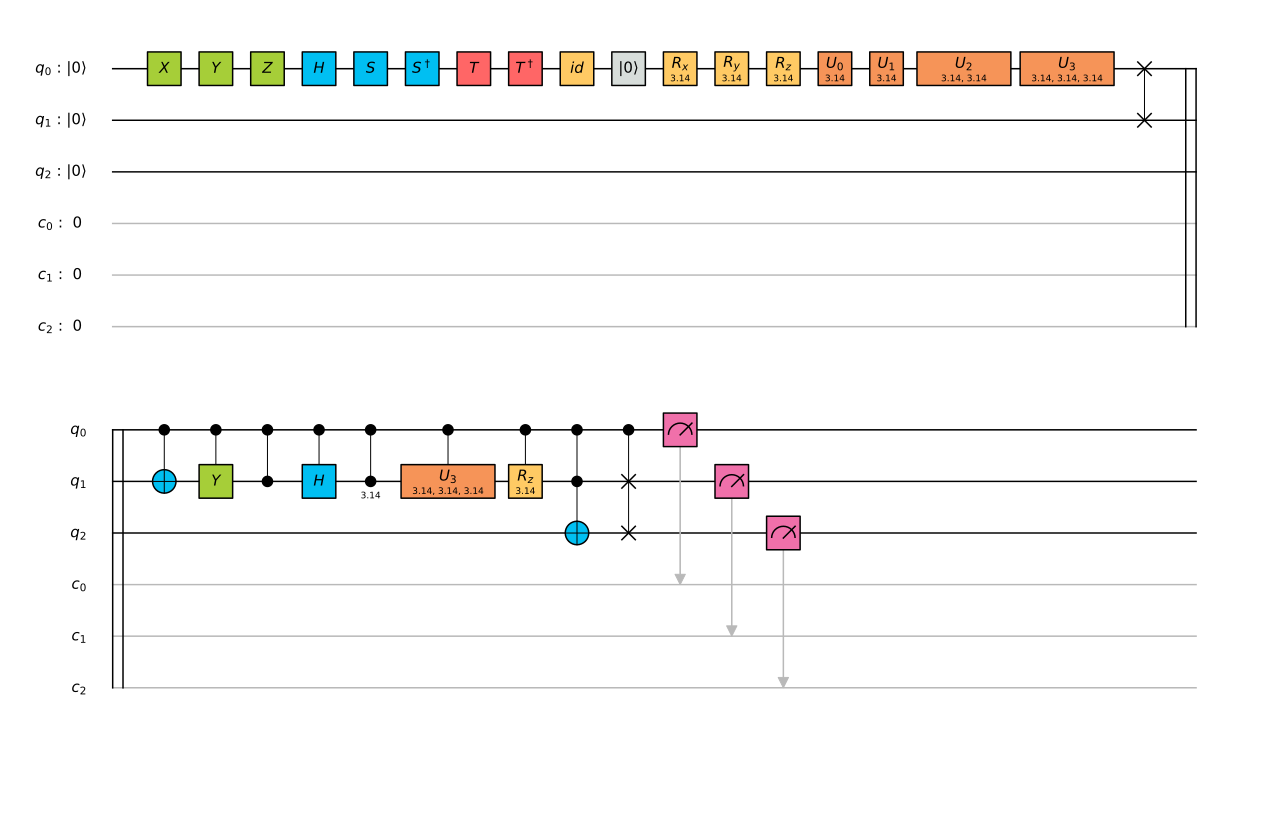

In [22]:
drawer(circuit_all, filename='circuit.png', style=cmp_style)